# Principal Component Analysis

In this notebook I will demonstrate my understanding of Principal Component Analysis (PCA) as a tool to reduce the number of dimensions in a dataset typically used for machine learning. I show my understanding of PCA by applying PCA usage as demonstrated in the chapter on PCA in the Python Data Science Handbook, on the Iris dataset. My purpose is to reduce the 4 dimensional Iris dataset to a two dimensional dataset using scikit-learn's PCA implementation.

## 1. load iris data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>


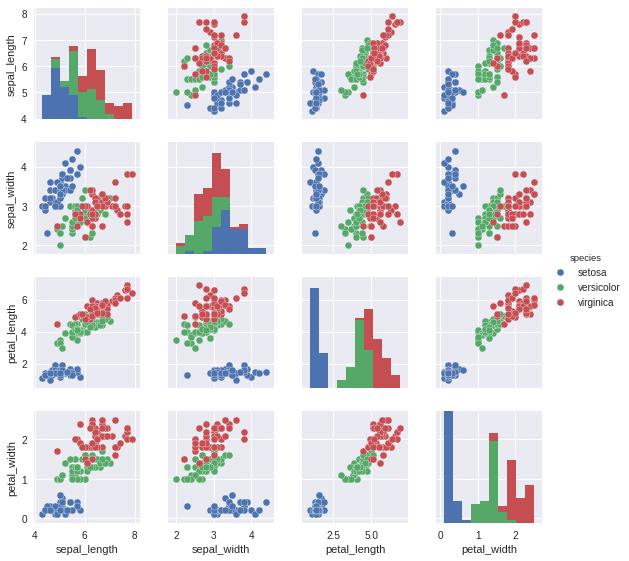

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

iris = sns.load_dataset('iris')
print(iris.head())
print(type(iris))
sns.pairplot(iris, hue='species', size=2)

## 2. import, configure and fit PCA

[your comment goes here]

In [2]:
from sklearn.decomposition import PCA
pca = PCA(2)

X_iris = iris[['sepal_length','sepal_width','petal_length','petal_width']].as_matrix()

pca = PCA(2)  # reduces from 4 features to 2 features
projected = pca.fit_transform(X_iris)

print(X_iris.shape)
print(projected.shape)

(150, 4)
(150, 2)


## 3. visualize results
Below I have visualized the three iris types using three different colors in a scatter plot, with the two pricipal components on x and y axis.

[your comment goes here]

ValueError: too many values to unpack (expected 2)

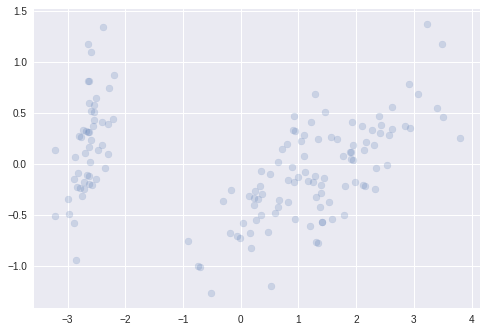

In [3]:


def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



## 4. classify the reduced data set to the 3 iris type

[You can skip this part of the exercise if it takes too long. You can choose your own classifier. Determine the accuracy of your model. How does it compare to the classifier you previously used on all 4 dimensions?]

In [4]:
y = iris['species'].values

trainX = projected[0:40, :]
trainX = np.concatenate((trainX, projected[50:90, :]), axis=0)
trainX = np.concatenate((trainX, projected[100:140, :]), axis=0)

testX = projected[40:50, :]
testX = np.concatenate((testX, projected[90:100, :]), axis = 0)
testX = np.concatenate((testX, projected[140:150, :]), axis = 0)


trainY = y[0:40]
trainY = np.concatenate((trainY, y[50:90]), axis= 0)
trainY = np.concatenate((trainY, y[100:140]), axis= 0)

testY = y[40:50]
testY = np.concatenate((testY, y[90:100]), axis= 0)
testY = np.concatenate((testY, y[140:150]), axis=0)


print(testX.shape)
print(trainX.shape)
print(testY.shape)
print(trainY.shape)

(30, 2)
(120, 2)
(30,)
(120,)


In [5]:
from sklearn import svm

iris_model = svm.SVC(kernel='linear', random_state=20)
iris_model.fit(trainX, trainY)

print("accuracy: " + str(iris_model.score(trainX, trainY)*100) + "%")

print ("Prediction Test " + str(iris_model.predict(testX)) )
#print ("Actual Test     " + str(testY))

print("accuracy Test: " + str(iris_model.score(testX, testY)*100) + "%")
#print("supported vectors: " + str(iris_model.support_vectors_))
print ("Bias " + str(iris_model.intercept_))
print("Coefficients : " + str(iris_model.coef_) )

accuracy: 95.0%
Prediction Test ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica']
accuracy Test: 100.0%
Bias [-1.13146855 -0.40122136  3.29770216]
Coefficients : [[-0.91349927  0.55016366]
 [-0.59861283  0.24041939]
 [-2.33240693  1.66028648]]
